In [1]:
import sys; sys.path.append(_dh[0].split("knowknow")[0])
from knowknow import *

# cited works

In [2]:
database_name = "sociology-wos"
dtype = 'c'

In [3]:
# Parameters
database_name = "sociology-jstor"
dtype = "t"


In [3]:
cits = get_cnt("%s.ind"%database_name, [comb(dtype,'fy'),'fy',dtype])
cysum = load_variable("%s.%s.ysum"%(database_name,dtype))

Loaded keys: dict_keys(['c.fy', 'fy', 'c'])
Available keys: ['c', 'c.c', 'c.fj', 'c.fy', 'c.fy.j', 'fa', 'fa.c', 'fa.fj', 'fa.fj.fy', 'fa.fy', 'fj', 'fj.fy', 'fj.ta', 'fj.ty', 'fy', 'fy.ta', 'fy.ty', 'ta', 'ty', 'ty.ty']


In [4]:
cc = Counter(int(x['total']) for _,x in cysum.items())
counts = []
totals = range(0,max(cc.keys())+1)
for i in totals:
    counts.append(cc[i])

In [5]:
# more than 5 times
print("%0.2f%% were cited more than 5 times" % (100 * sum(counts[i] for i in totals if i>5)/np.sum(totals)))

5.76% were cited more than 5 times


c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


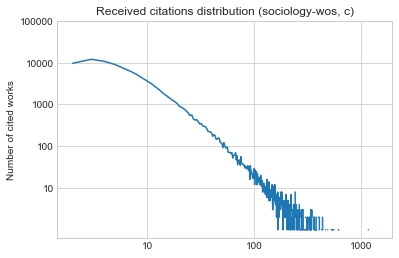

In [6]:
counts = np.array(counts)
totals = np.array(totals)
plt.plot(np.log10(totals),np.log10(counts))
xlab = np.array([1,2,3])
plt.xticks(
    xlab,
    np.power(10, xlab)
)
ylab = np.array([1,2,3,4,5])
plt.yticks(
    ylab,
    np.power(10, ylab)
)

plt.ylabel("Number of citations")
plt.ylabel("Number of cited works")
title = "Received citations distribution (%s, %s)" % (database_name,dtype)
plt.title(title)

save_figure(title)

In [7]:
import statsmodels.api as sm

In [16]:
CUTOFF = 10
lt,lc = [x for i,x in enumerate(totals) if (totals[i]>CUTOFF and counts[i]>0)], [x for i,x in enumerate(counts) if (totals[i]>CUTOFF and counts[i]>0)]
lt,lc = np.log(lt),np.log(lc)

X = sm.add_constant(lt)
y = lc

mod = sm.OLS(y,X)

In [17]:
res = mod.fit()

In [18]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     2890.
Date:                Wed, 27 May 2020   Prob (F-statistic):          2.38e-189
Time:                        14:39:37   Log-Likelihood:                -434.23
No. Observations:                 418   AIC:                             872.5
Df Residuals:                     416   BIC:                             880.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6858      0.189     61.682      0.000      11.313      12.058
x1            -1.8983      0.035    -53.759      0.000      -1.968      -1.829
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   0.492
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.889
Skew:                           0.159   Prob(JB):                        0.389
Kurtosis:                       3.083   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""